<ipython-input-16-718f77966dfe>:73: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


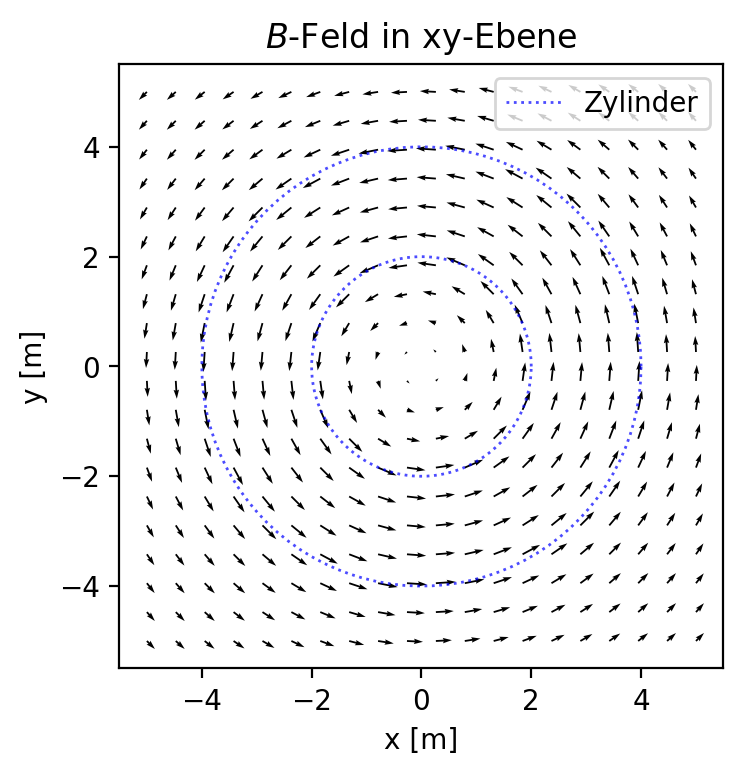

In [16]:
import numpy as np
import matplotlib.pyplot as plt

I1 = 1
I2 = 1
mu0 = 1.257*1e-6
R1 = 2
R2 = 4
grid = 20 ##Zahl der Zeilen und spalten
x = np.linspace(-5,5,grid)
y = np.linspace(-5,5,grid)
rx,ry = np.meshgrid(x,y)



def B_in(x,y):
    r = np.sqrt(x**2+y**2)
    B_in = mu0*I1/(2*np.pi*R1**2)*r
    Bx = B_in * (-y/r)
    By = B_in * (x/r)
    return Bx , By


def B_mid(x,y):
    r = np.sqrt(x**2+y**2)
    B_mid = mu0/(2*np.pi*r)* (I1 +I2*(r**2-R1**2)/(R2**2-R1*2))
    Bx = B_mid * (-y/r)
    By = B_mid * (x/r)
    return Bx , By



def B_out(x,y):
    r = np.sqrt(x**2+y**2)
    B_out = mu0/(2*np.pi*r)*(I1+I2)
    Bx = B_out * (-y/r)
    By = B_out * (x/r)
    return Bx , By


def B(x,y):
    r = np.sqrt(x**2+y**2)
    if(r < R1):
        return B_in(x,y)
    elif( R1 < r < R2):
        return B_mid(x,y)
    else:
        return B_out(x,y)

Bx, By = np.meshgrid(np.zeros(grid),np.zeros(grid))

for i in range(grid):
    for j in range (grid):
        Bx[i][j] = B(rx[i][j],ry[i][j])[0]
    
for i in range(grid):
    for j in range (grid):
        By[i][j] = B(rx[i][j],ry[i][j])[1]
    
    
theta = np.linspace(0,2*np.pi,100)
x1 = R1*np.cos(theta)
y1 = R1*np.sin(theta)

x2 = R2*np.cos(theta)
y2 = R2*np.sin(theta)

R = R1
plt.figure(dpi=200)
plt.title("$B$-Feld in xy-Ebene")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.axes().set_aspect('equal')
plt.quiver(rx,ry,Bx,By)
plt.plot(x1,y1,':', linewidth = 1, color = "blue",alpha = 0.7, label = "Zylinder")
plt.plot(x2,y2,':',linewidth = 1, color = "blue",alpha = 0.7)
plt.legend(loc = "upper right")
plt.savefig("6_1b.png")